# Random Processes

Random processes (also called Stochastic Processes) are processes that are random but with some kind of inherant internal structure. For example, Markov chains are random. In the [Markov chain lesson](markov-chain.ipynb), we saw how to generate random text using Markov chains. The text was random, but the internal dynamics were not. We had a well known probabilistic structure to the problem.

Here we will study how random-ness can help us make predictions and measure uncertainty. The stock market is a good example ~~, but lets examine [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion). Below I wrote a simulation for a many [particle system](particle-simulation.ipynb). No need to understand it, we will just analyze the data.~~

Looking at the DOW,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('^DJI.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000
5,1985-02-05,1294.060059,1301.130005,1278.599976,1285.229980,1285.229980,13800000
6,1985-02-06,1284.890015,1294.500000,1275.069946,1280.589966,1280.589966,14610000
7,1985-02-07,1285.000000,1297.040039,1279.810059,1290.079956,1290.079956,11440000
8,1985-02-08,1290.079956,1297.150024,1281.359985,1289.969971,1289.969971,8000000
9,1985-02-11,1287.989990,1291.739990,1268.660034,1276.060059,1276.060059,12600000


Let's look at the closing price

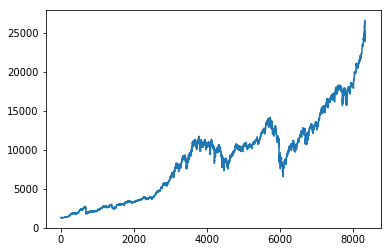

In [3]:
plt.plot(df['Close'])

The stock market is supposed to grow exponentially. The data model might look like,

$$\begin{align}
\nu(t) &= (A + \beta) e^{r t + \alpha} \\
  &= Ae^{r t} e^\alpha + \beta e^{r t}e^{\alpha}
\end{align}$$

where $ \alpha, \beta $ are noise terms that generate the random nature of the data. Because of the exponetial nature of the data, it is useful to plot the log of the data,

$$\begin{align}
\log \nu(t) = \log (A + \beta) + r t + \alpha
\end{align}$$

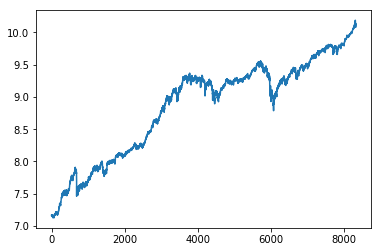

In [25]:
log_close = np.log(df['Close'])
plt.plot(log_close)

## Least Squares

The data looks roughly like a straight line, but with some noise. The above equation for the line is of the form,

$$
y = m x + b
$$

that we are used to, just with some variables exchanged.

$$\begin{align}
m &= r \\
b &= \log (A + \beta) + \alpha
\end{align}$$

We can use linear regression to find the optimal $ m $ for the data. We could do this with `np.polyfit`, but for an exercise, we will do it ourselves.

We will define a couple of useful functions for our work. One that does our naive linear prediction and the other that measures the error $ \sum_t \big( m t + b - \nu(t) \big)^2 $.

**Problem:** Define the error function below taking the sum of the square difference from the prediction to the actual output for every point in `log_close`. Use `t = np.arange(log_close.size)` for the time.

In [30]:
def predict(t, m, b):
    return m*t + b

def error(m, b):
    t = np.arange(log_close.size)
    error = 0
    for i in range(len(log_close)):
        current = (predict(t[i], m, b) - log_close[i])**2
        error = error + current
    return error # REPLACE!

Now, we can plot the error function for all values of `m` with `b=7` fixed.

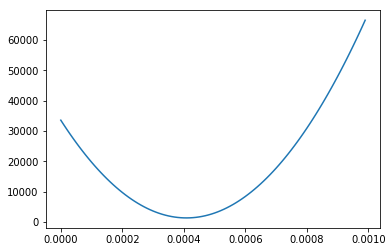

In [31]:
possible_m = np.arange(0.0, 1e-3, 1e-5)
e = [error(m, 7.0) for m in possible_m]
plt.plot(possible_m, e)

**Problem:** Graphically find the minima and plot the prediction vs. the actual data

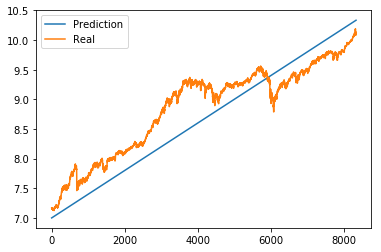

In [32]:
m_optimal = 0.0004 # find the minimum error on the graph
t = np.arange(log_close.size)
plt.plot(t, predict(t, m_optimal, 7.0))
plt.plot(t, log_close)
plt.legend(['Prediction', 'Real'])
plt.show()

We get a pretty good fit, but it's not exceptional, and only works when we can plot the error function. If we can't plot the error function, then we at stuck. A better way to do this is to compute the derivitive and step down the slope. For the error function $ \ell(m, b) $,

$$\begin{align}
\frac{d}{dm} \ell(m, b) &\approx \frac{\ell(m + \Delta m, b) - \ell(m, b)}{\Delta m} \\
\frac{d}{db} \ell(m, b) &\approx \frac{\ell(m, b + \Delta b) - \ell(m, b)}{\Delta b}
\end{align}$$

**Problem:** Write a function that computes the derivitive at every point $(m, b)$. Note that this derivative happens in two parts and is actually called the [gradient](https://en.wikipedia.org/wiki/Gradient)

In [38]:
def derivative_b(m, b, db):
    """
    Here m will be held constant, but b will change to compute the derivative on b
    """
    return (error(m, b + db) - error(m, b))/db
    pass

def derivative_m(m, b, dm):
    return (error(m + dm, b) - error(m, b))/dm
       

def gradient(m, b, dm=1e-3, db=1e-3):
    return np.array([derivative_m(m, b, dm), derivative_b(m, b, db)])

Now you just need to move down the gradient with [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent). You can watch [this animation](https://www.youtube.com/watch?v=GCvWD9zIF-s) to get an intuition for what is happening. The equations for running gradient descent look like,

$$\begin{align}
m_{t+1} &= m_t - \epsilon \frac{d}{dm} \ell(m, b) \\
b_{t+1} &= b_t - \epsilon \frac{d}{db} \ell(m, b) \\
\end{align}$$
where $ \epsilon $ is called the "step size"

For gradient descent you need a step size and a number of steps. Picking appropriate values for this is an art. We will experiment with different values for each.

**Problem:** First implement gradient descent according to the formula above. Then run the plots below. You should see the error going down, m going to `0.004` and b going to 7.

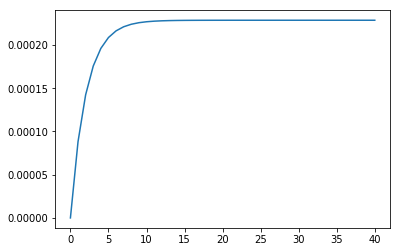

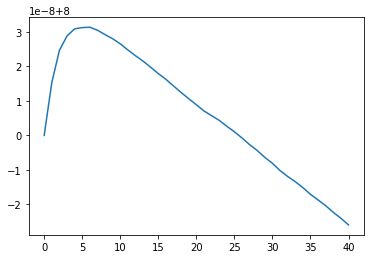

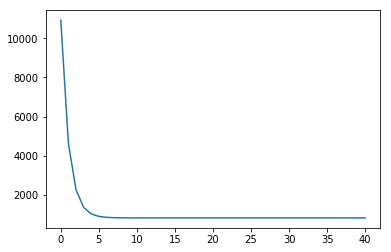

In [45]:
def next_step(m, b, eps):
    """
    Compute the next (m, b) using gradient descent
    """
    next_m = m - eps*derivative_m(m, b, eps*1e-2)
    next_b = b - eps*derivative_b(m, b, eps*1e-2)
    return next_m, next_b

step_size = 1e-12
M, B = [0.0], [8.0]
for i in range(40):
    m, b = next_step(M[-1], B[-1], step_size)
    M.append(m)
    B.append(b)

errs = [error(m, b) for m, b in zip(M, B)]

plt.plot(M)
plt.show()
plt.plot(B)
plt.show()
plt.plot(errs)
plt.show()

## Random terms

The original model was,

$$\begin{align}
\log \nu(t) = \log (A + \beta) + r t + \alpha
\end{align}$$

We found the linear approximation, so now we can subtract it off from the original data.

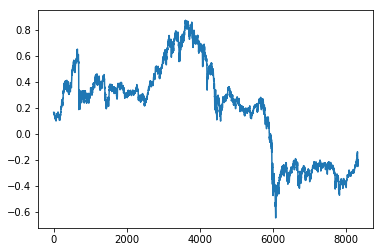

In [48]:
normalized_close = log_close - (0.0004 * np.arange(log_close.size) + 7.0)

plt.plot(normalized_close)
plt.show()

This looks like a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process). If we take the point wise difference, we should see a rought normal distribution.

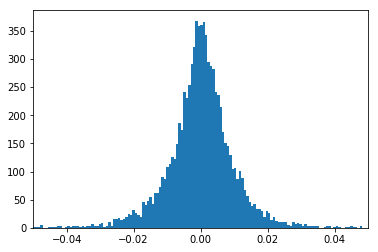

In [49]:
plt.hist(np.diff(normalized_close), bins=500)
plt.xlim([-0.05, 0.05])
plt.show()

Looks pretty normally distributed. Lets look at the mean and standard deviation. Then we can replicate the data.

-4.46905475419106e-05 0.011029484243152596


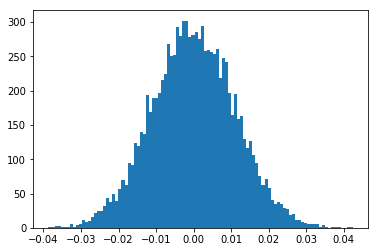

In [50]:
mean, std = np.mean(np.diff(normalized_close)), np.std(np.diff(normalized_close))
print(mean, std)
plt.hist(std*(np.random.randn(10000) + mean), bins=100)
plt.show()

Now, the normal distribution isn't a perfect fit, but it works fairly well. The Weiner process is just the cumulative sum of the random normal noise. the poor fitting is due to the other noise term I included above.

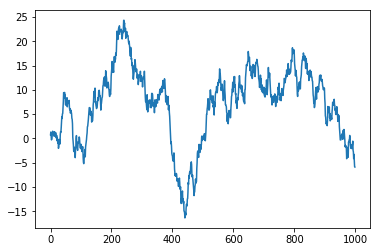

In [51]:
plt.plot(np.cumsum(np.random.randn(1000)))

This noise allows us to simulate the stock market using all of our terms. We can simulate several runs of the stock market to get a spread of probable ending values

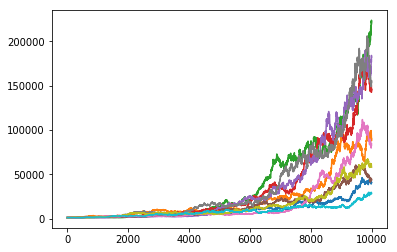

In [52]:
for i in range(10):
    log_simulated_close = 0.0004 * np.arange(10000) + 7.0 + np.cumsum(std*(np.random.randn(10000) + mean))
    simulated_close = np.exp(log_simulated_close)
    plt.plot(simulated_close)
plt.show()